#The Problem

The goal is to create a model to predict whether a person has heart disease based on correlated health variables. This problem is a binary classification problem with the target variable being Heart_Disease in the dataset. The remaining variables in the dataset are explored to determine any patterns/relationships between them and the target variable to be used to train the model.

# Setup

Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis

Import Dataset

In [ ]:
df = pd.read_csv('/content/CVD_cleaned.csv')

df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


Rename colums for easier analysis

In [ ]:
df.rename({'Height_(cm)': 'Height', 'Weight_(kg)': 'Weight'}, axis=1, inplace=True)
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height,Weight,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# Exploratory Data Analysis

##Data Structure

###Data shape

In [ ]:
df.shape

(308854, 19)

###Data Type

In [ ]:
print(df.dtypes)

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height                          float64
Weight                          float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object


###Summary Statistics

In [ ]:
df.describe()

,Height,Weight,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


Max weight and BMI are quite high, may be outlier to remove.

###Skew

In [ ]:
numerical = df[['Height', 'Weight', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']]

In [ ]:
print(skew(numerical, axis = 0, bias = True))

[0.01531112 1.05819855 1.37661257 1.88561304 1.24842207 2.41559593
 4.91232571]


The numeric variables in the dataset have a skewness value greater than 0, therefore overall there is more weight in the right tail of the variable distributions.

###Kurtosis

In [ ]:
print(kurtosis(numerical, axis = 0, bias = True))

[5.74622956e-03 2.57366431e+00 4.24096909e+00 2.54020030e+00
 1.25374805e+00 9.44391372e+00 4.22302112e+01]


The fried potato consumption variable has a kurtosis distribution of 4, which indicates it is leptokurtic. The other variables have a kurtosis less than 3 and are considered playkurtic.

###Null/Missing Values

In [ ]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height                          0
Weight                          0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

###Outliers

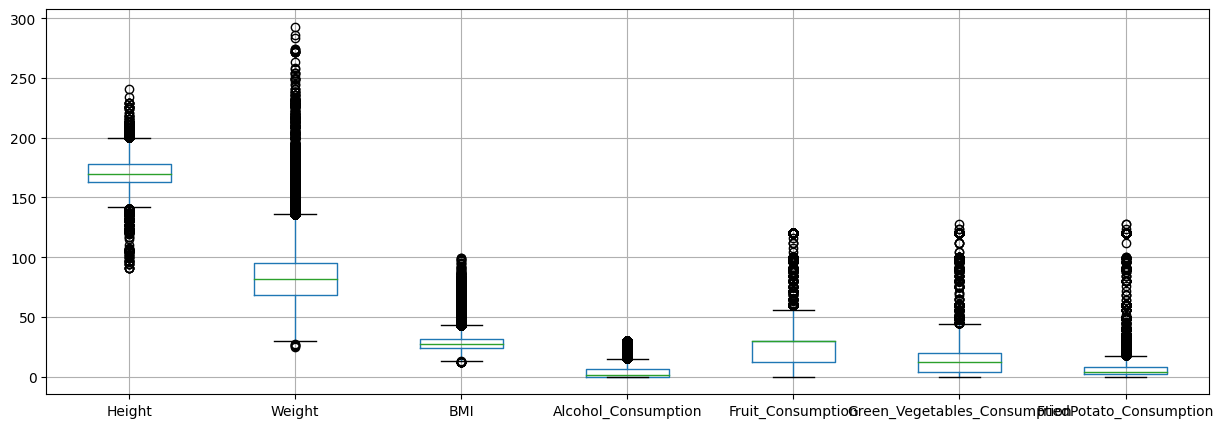

In [ ]:
plt.figure(figsize=(15,5))
df.boxplot()
plt.show()

# Univariate Analysis

##General Health

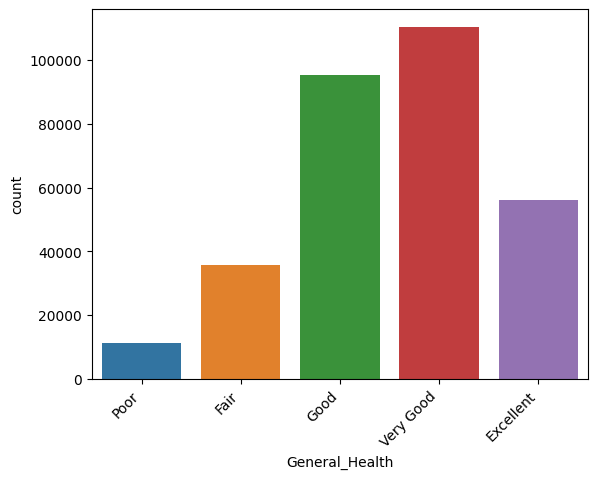

In [ ]:
health = sns.countplot(x = 'General_Health', data = df, order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
health = plt.setp(health.get_xticklabels(), ha = 'right', rotation = 45)

The majority of patients in the dataset reported a general health rating of good, very good, or excellent.

##Checkup

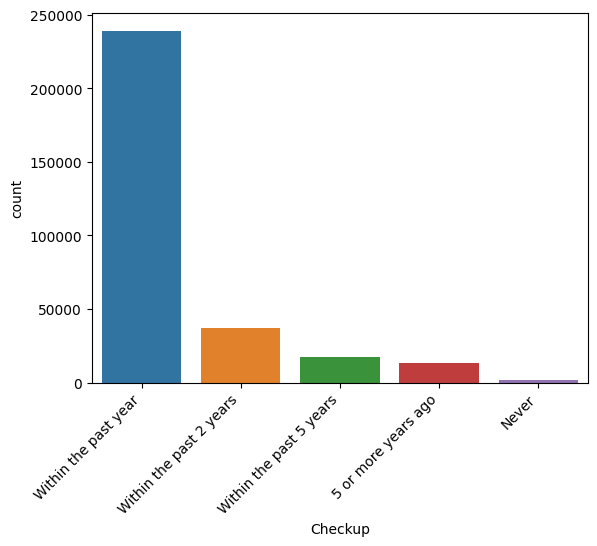

In [ ]:
checkup = sns.countplot(x = 'Checkup', data = df, order = ['Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago', 'Never'])
checkup = plt.setp(checkup.get_xticklabels(), ha ='right', rotation = 45)

A vast majority of patients reported a checkup within the past year.

##Exercise

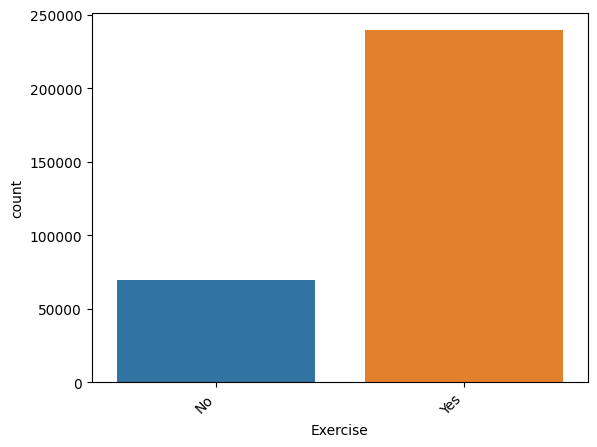

In [ ]:
exercise = sns.countplot(x = 'Exercise', data = df, order = ['No', 'Yes'])
exercise = plt.setp(exercise.get_xticklabels(), ha = 'right', rotation = 45)

A majority of patients reported that they exercise.

##Heart Disease

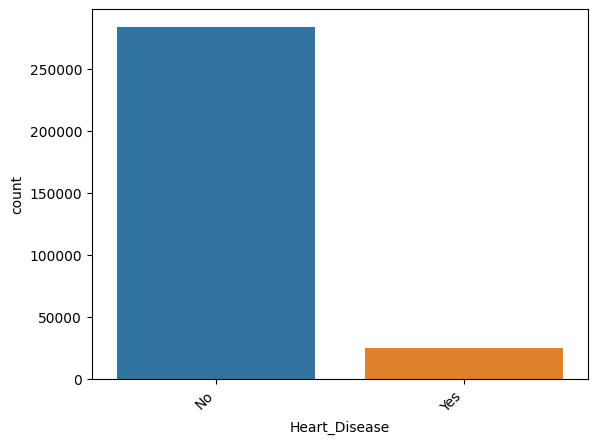

In [ ]:
heart = sns.countplot(x = 'Heart_Disease', data = df, order = ['No', 'Yes'])
heart = plt.setp(heart.get_xticklabels(), ha = 'right', rotation = 45)

Only a small percentage of patients reported heart disease.

Due to the small percentage of reported heart disease, the data may be imbalanced. This can be resolved throguh several methods, which include resampling (oversample minority class or undersample majority class), synthetic data generation, or implementing class weights.

##Skin Cancer

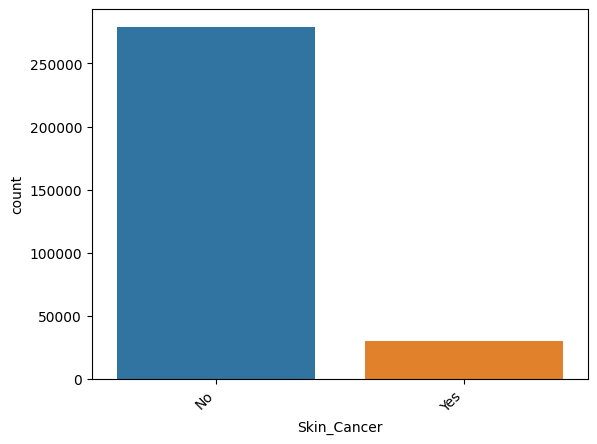

In [ ]:
skin = sns.countplot(x = 'Skin_Cancer', data = df, order = ['No', 'Yes'])
skin = plt.setp(skin.get_xticklabels(), ha = 'right', rotation = 45)

Only a small percentage of patients reported skin cancer.

##Other Cancer

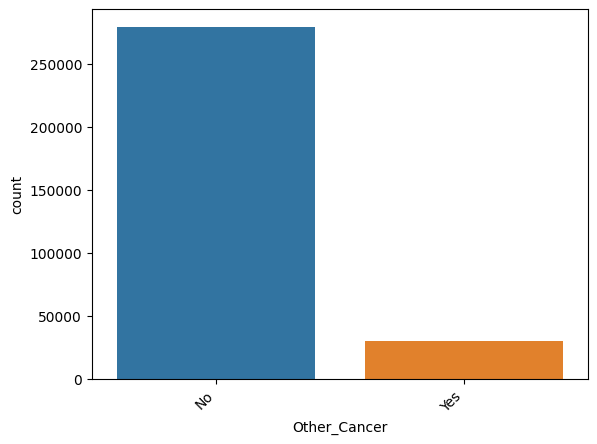

In [ ]:
other = sns.countplot(x = 'Other_Cancer', data = df, order = ['No', 'Yes'])
other = plt.setp(other.get_xticklabels(), ha = 'right', rotation = 45)

Only a small percentage of patients reported other types of cancer.

##Depression

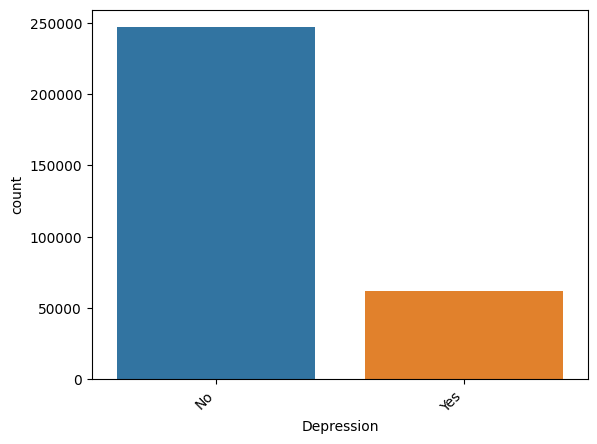

In [ ]:
depression = sns.countplot(x = 'Depression', data = df, order = ['No', 'Yes'])
depression = plt.setp(depression.get_xticklabels(), ha = 'right', rotation = 45)

Less than 25% of patients reported depression.

##Diabetes

In [ ]:
#Renaming categories for easier analysis
df['Diabetes'].replace({'No, pre-diabetes or borderline diabetes': 'Pre-diabetic/Borderline'}, inplace = True)
df['Diabetes'].replace({'Yes, but female told only during pregnancy': 'Gestational'}, inplace = True)

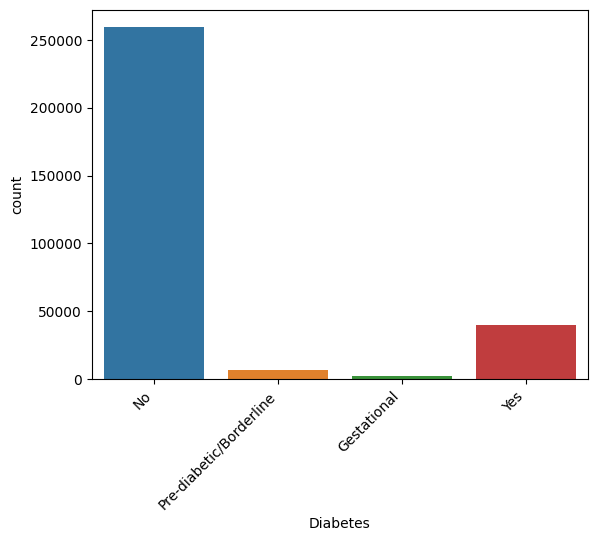

In [ ]:
diabetes = sns.countplot(x = 'Diabetes', data = df, order = ['No', 'Pre-diabetic/Borderline', 'Gestational', 'Yes'])
diabetes = plt.setp(diabetes.get_xticklabels(), ha = 'right', rotation = 45)

A small percentage of patients reported pre-diabetes/borderline diabetes, gestational diabetes, and diabetes.

##Arthritis

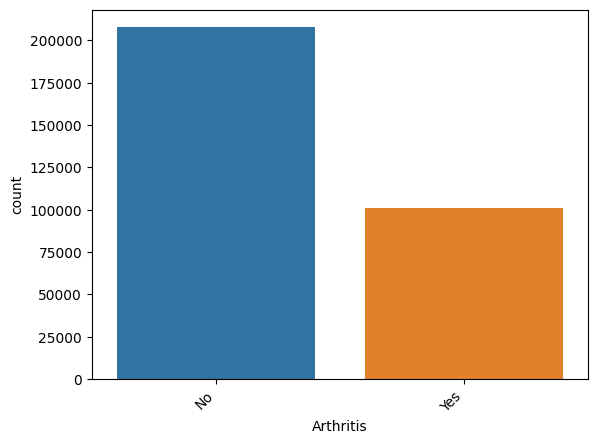

In [ ]:
arthritis = sns.countplot(x = 'Arthritis', data = df, order = ['No', 'Yes'])
arthritis = plt.setp(arthritis.get_xticklabels(), ha = 'right', rotation = 45)

The majority of patients did not report arthritis.

##Sex

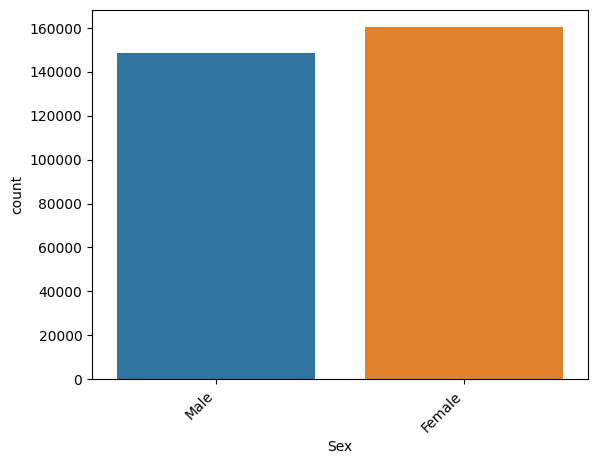

In [ ]:
sex = sns.countplot(x = 'Sex', data = df, order = ['Male', 'Female'])
sex = plt.setp(sex.get_xticklabels(), ha = 'right', rotation = 45)

There are a similar number of male and female patients, with a slightly higher count of female patients.

##Age Category

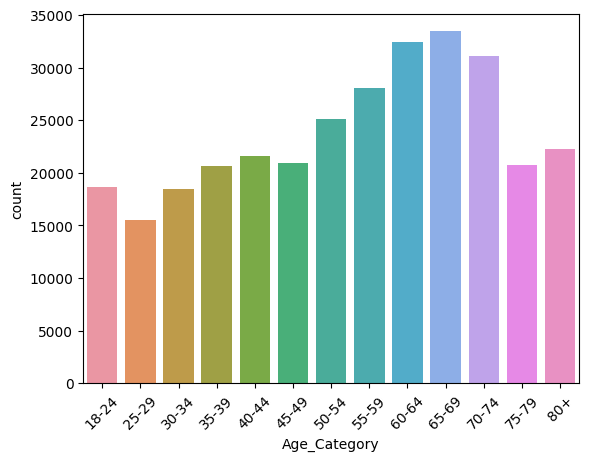

In [ ]:
age = sns.countplot(x = 'Age_Category', data = df, order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'])
age = plt.setp(age.get_xticklabels(), rotation = 45)

The largest patient age group was between 65-69 years, while the smallest was between 25-29 years.

In [ ]:
# Narrowing age variables
df['Age_Category'].replace({'18-24': '18-29'}, inplace = True)
df['Age_Category'].replace({'25-29': '18-29'}, inplace = True)
df['Age_Category'].replace({'30-34': '30-39'}, inplace = True)
df['Age_Category'].replace({'35-39': '30-39'}, inplace = True)
df['Age_Category'].replace({'40-44': '40-49'}, inplace = True)
df['Age_Category'].replace({'45-49': '40-49'}, inplace = True)
df['Age_Category'].replace({'50-54': '50-59'}, inplace = True)
df['Age_Category'].replace({'55-59': '50-59'}, inplace = True)
df['Age_Category'].replace({'60-64': '60-69'}, inplace = True)
df['Age_Category'].replace({'65-69': '60-69'}, inplace = True)
df['Age_Category'].replace({'70-74': '70-79'}, inplace = True)
df['Age_Category'].replace({'75-79': '70-79'}, inplace = True)
df['Age_Category'].replace({'80+': '80+'}, inplace = True)

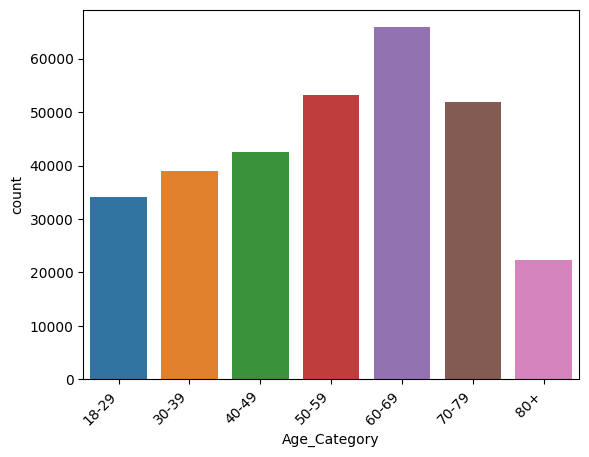

In [ ]:
age = sns.countplot(x = 'Age_Category', data = df, order = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])
age = plt.setp(age.get_xticklabels(), ha = 'right', rotation = 45)

The most common age range is between 60-69 and the least common age range is older than 80. There is a gretaer amount of older patients than younger patients.

##Smoking

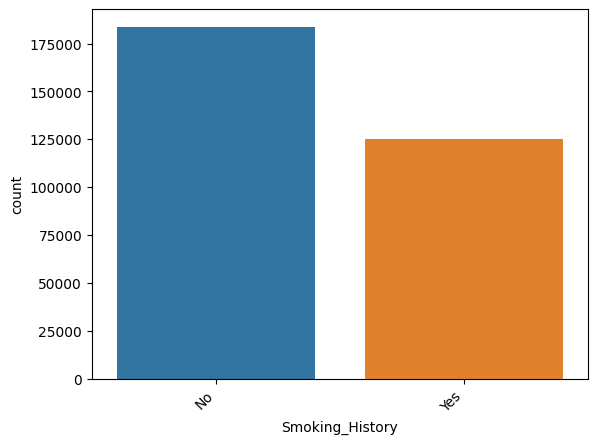

In [ ]:
smoke = sns.countplot(x = 'Smoking_History', data = df, order = ['No', 'Yes'])
smoke = plt.setp(smoke.get_xticklabels(), ha = 'right', rotation = 45)

There were more patients who reported they don't smoke than patients that do smoke.

##Height

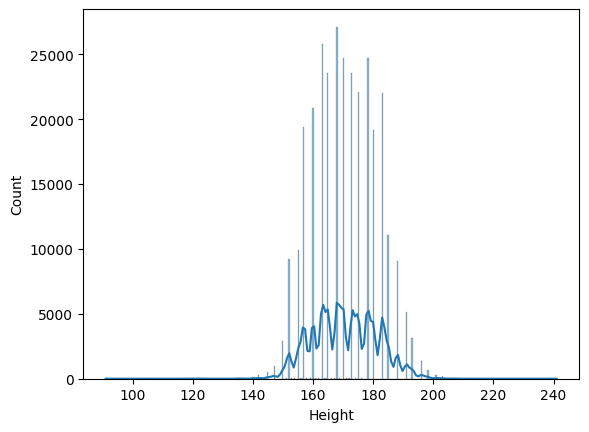

In [ ]:
height = sns.histplot(data = df, x = 'Height', kde = True)

The height distribution looks normal. Most of the observed patients have a height between 160 and 180 cm.

##Weight

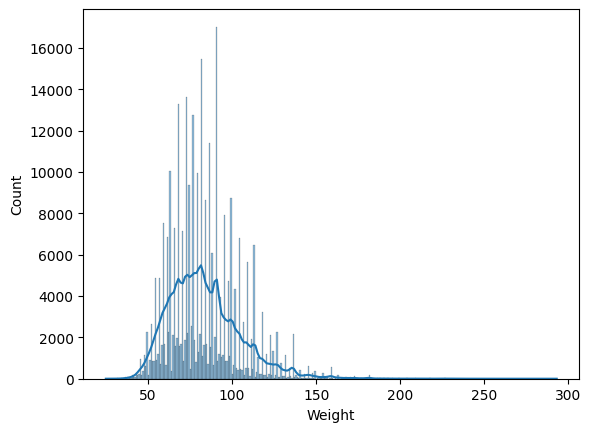

In [ ]:
weight = sns.histplot(data = df, x = 'Weight', kde = True)

The weight distribution looks normal. Most of the patients have a weight between 50 and 100 kg.

##BMI

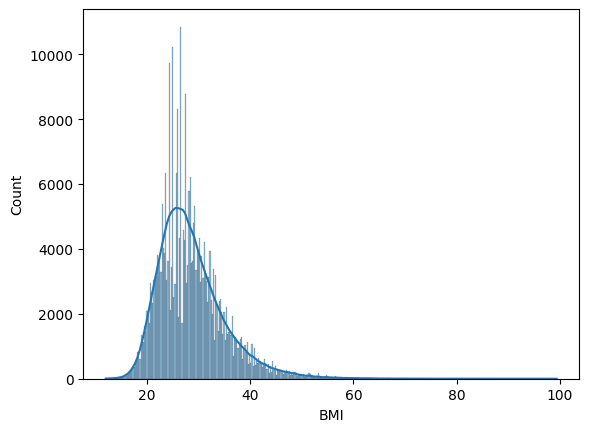

In [ ]:
bmi = sns.histplot(data = df, x = 'BMI', kde = True)

The BMI distribution looks slightly skewed to the right. Most of the patients have a BMI between 20 and 30. There are a larger amount of patients with a BMI greater than 30, which indicates obesity.

##Alcohol Consumption

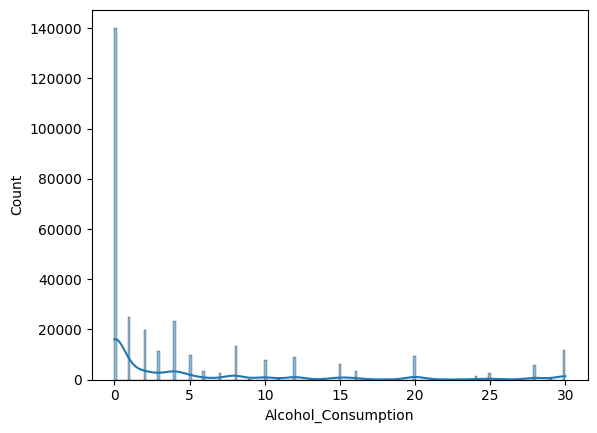

In [ ]:
alcohol = sns.histplot(data = df, x = 'Alcohol_Consumption', kde = True)

The alcohol consumption distribution is skewed to the right. Most of the patients reported no alcohol consumption but there are patients consuming a greater amount of alcohol.

##Fruit Consumption

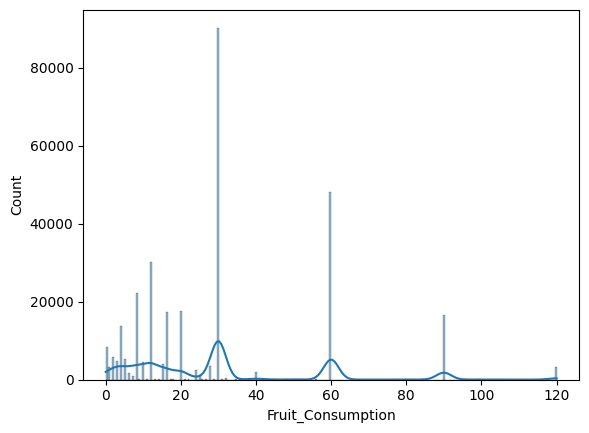

In [ ]:
fruit = sns.histplot(data = df, x = 'Fruit_Consumption', kde = True)

The fruit consumption distribution is skewed to the right. A majority of patients regularly eat fruit, but there are many patients that don't regularly eat fruit as well.

##Green Vegetable Consumption

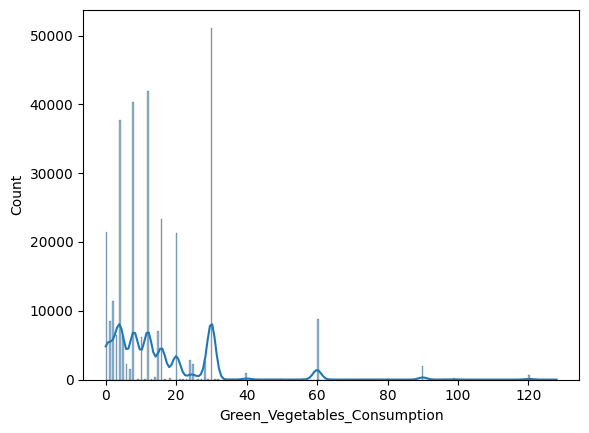

In [ ]:
green = sns.histplot(data = df, x = 'Green_Vegetables_Consumption', kde = True)

The green vegetable consumption distribution is skewed to the right. Most patients in the survey eat green vegetables regularly, but there are many patients that don't regularly eat green vegetables as well.

##Fried Potato Consumption

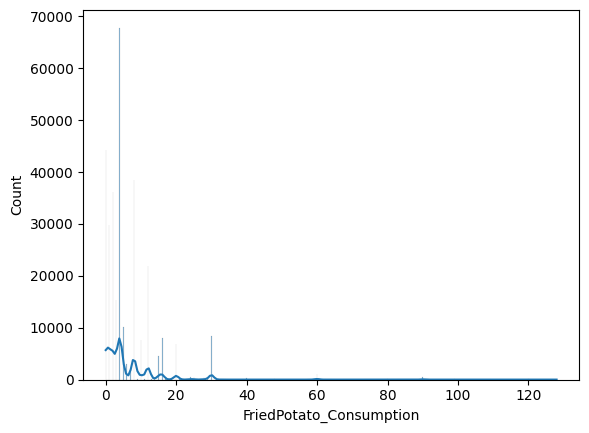

In [ ]:
fried = sns.histplot(data = df, x = 'FriedPotato_Consumption', kde = True)

The fried potato consumption distribution is skewed to the right. A majority of patients consume fried potatos to some degree, but there are some patients that consume them more often.

# Bivariate Analysis

##General Health vs Heart Disease

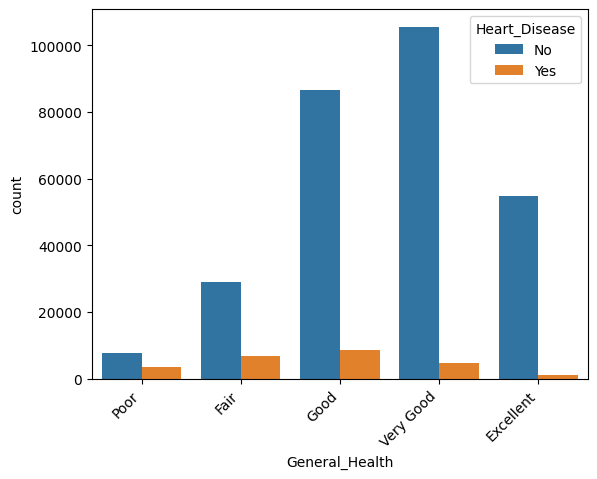

In [ ]:
gh = sns.countplot(data = df, x = 'General_Health', hue = 'Heart_Disease', order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
gh = plt.setp(gh.get_xticklabels(), ha = 'right', rotation = 45)

Patients that reported heart disease were also more likely to report their health as poor, fair, or good.

##Exercise vs Heart Disease

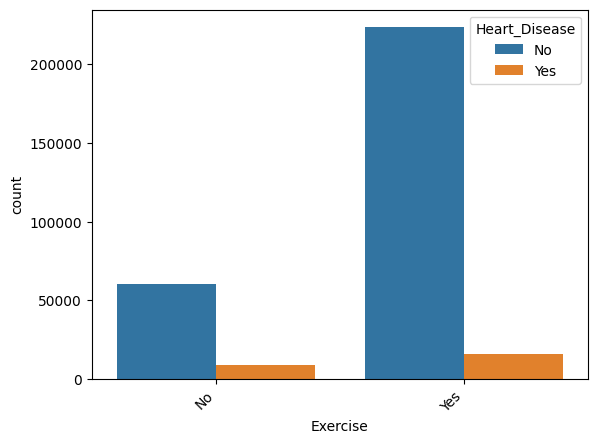

In [ ]:
eh = sns.countplot(data = df, x = 'Exercise', hue = 'Heart_Disease', order = ['No', 'Yes'])
eh = plt.setp(eh.get_xticklabels(), ha = 'right', rotation = 45)

Of the patients that reported heart disease, there were more patients that reported exercise than no exercise.

##Sex vs Heart Disease

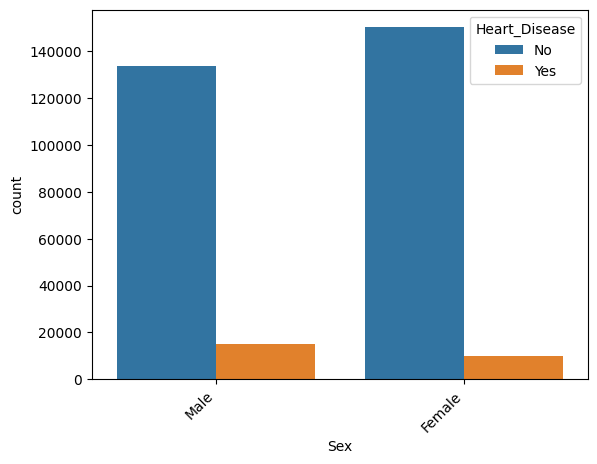

In [ ]:
sh = sns.countplot(data = df, x = 'Sex', hue = 'Heart_Disease', order = ['Male', 'Female'])
sh = plt.setp(sh.get_xticklabels(), ha = 'right', rotation = 45)

Of the patients that reported heart disease, there were more male patients than female patients.

##Age vs Heart Disease

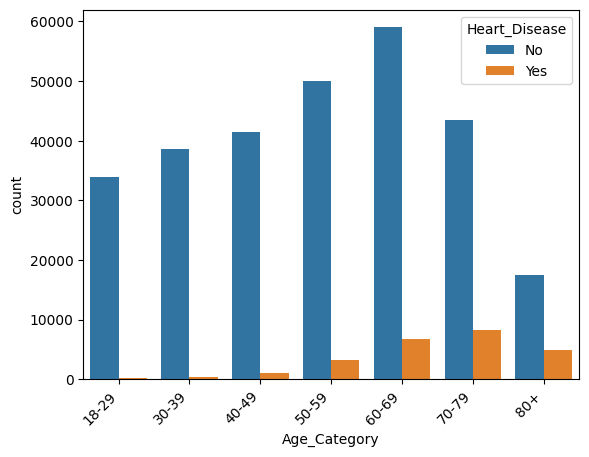

In [ ]:
ah = sns.countplot(data = df, x = 'Age_Category', hue = 'Heart_Disease', order = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'])
ah = plt.setp(ah.get_xticklabels(), ha = 'right', rotation = 45)

Of the patients that reported heart disease, the vast majority of patients were older. The most common age of those with heart disease was in the 70-79 year range. As the patient's age increased, the prevalence of heart disease increased as well.

##Smoking vs Heart Disease

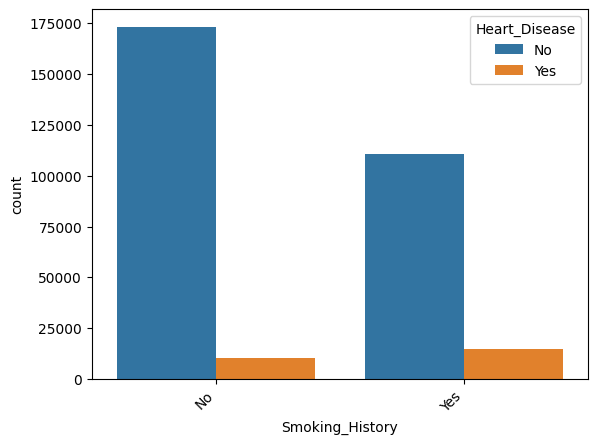

In [ ]:
smh = sns.countplot(data = df, x = 'Smoking_History', hue = 'Heart_Disease', order = ['No', 'Yes'])
smh = plt.setp(smh.get_xticklabels(), ha = 'right', rotation = 45)

Of the patients that reported heart disease, there were more patients with a history of smoking than no smoking.

# Multivariate Analysis

##General Health vs Age

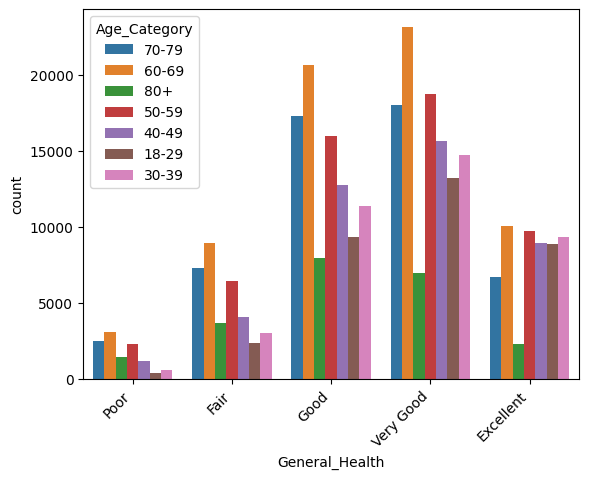

In [ ]:
fig = sns.countplot(data = df, x = 'General_Health', hue = 'Age_Category', order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
fig = plt.setp(fig.get_xticklabels(), ha = 'right', rotation = 45)

A majority of patients reported Good, Very Good, and Excellent health. As the health rating went from Good to Very Good to Excellent, the percentage of older patients reporting in that category decreased.

##Skin Cancer vs General Health

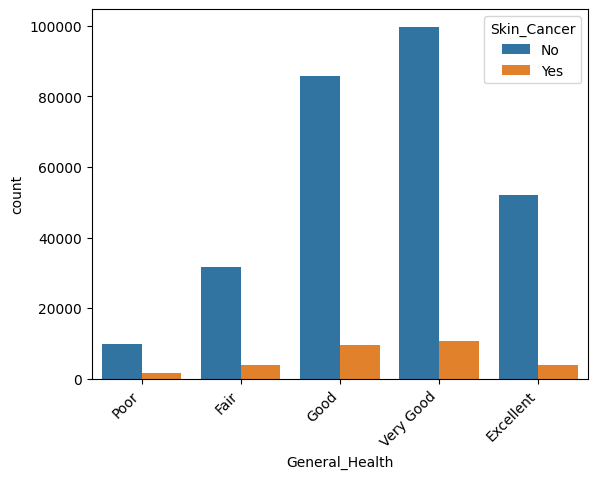

In [ ]:
fig = sns.countplot(data = df, x = 'General_Health', hue = 'Skin_Cancer', order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
fig = plt.setp(fig.get_xticklabels(), ha = 'right', rotation = 45)

The majority of patients who reported skin cancer also reported Good, Very Good, or Excellent health.

##Other Cancer vs General Health

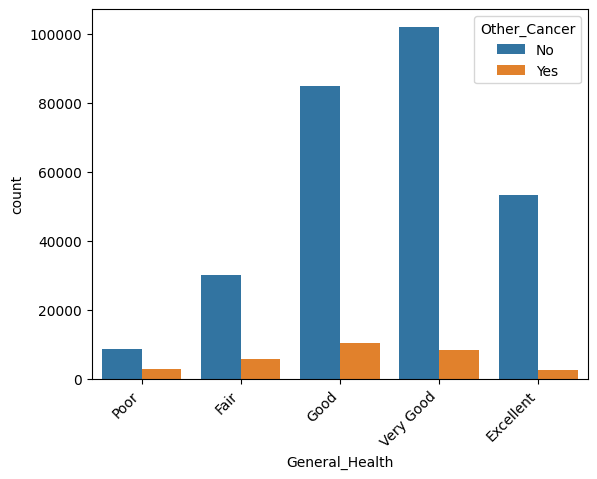

In [ ]:
fig = sns.countplot(data = df, x = 'General_Health', hue = 'Other_Cancer', order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
fig = plt.setp(fig.get_xticklabels(), ha = 'right', rotation = 45)

The majority of patients who reported cancer also reported Fair, Good, or Very Good health.

##Diabetes vs General Health

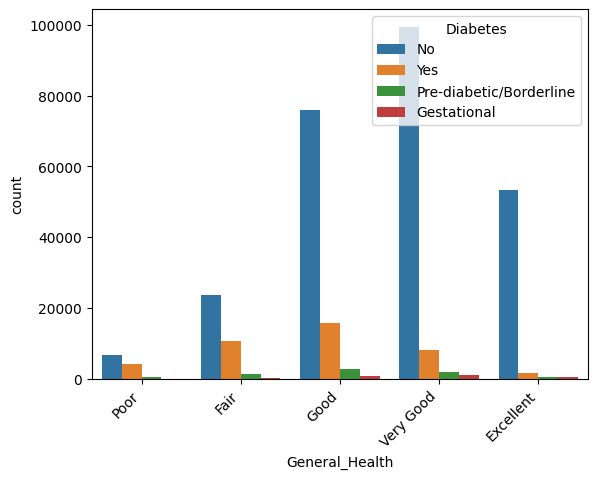

In [ ]:
fig = sns.countplot(data = df, x = 'General_Health', hue = 'Diabetes', order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
fig = plt.setp(fig.get_xticklabels(), ha = 'right', rotation = 45)

The majority of patients who reported diabetes also reported Fair, Good, or Very Good health.

##Arthritis vs General Health

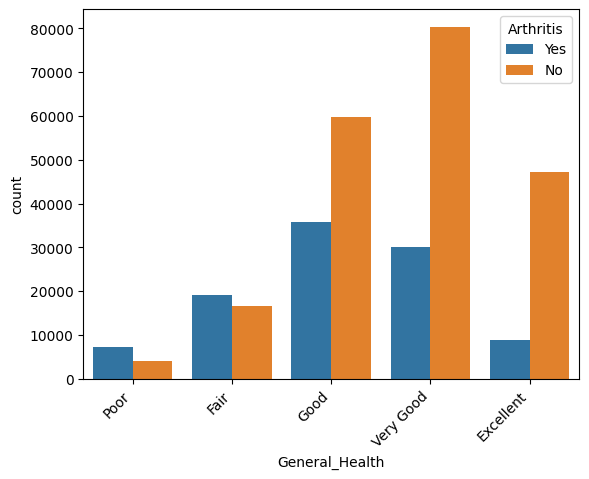

In [ ]:
fig = sns.countplot(data = df, x = 'General_Health', hue = 'Arthritis', order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
fig = plt.setp(fig.get_xticklabels(), ha = 'right', rotation = 45)

The majority of patients who reported arthritis also reported Fair, Good, and Very Good health.

##BMI vs Exercise

Add histogram bins to fall within BMI ranges:

* <18.5 for underweight range
* 18.5 < 25 for normal range
* 25 < 30 for overweight range
* 30 + for obese range

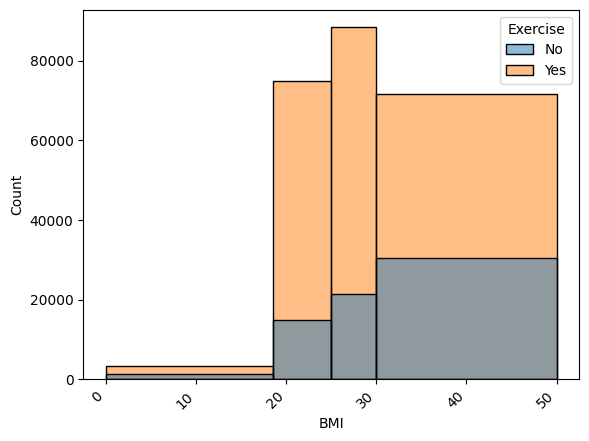

In [ ]:
fig = sns.histplot(data = df, x = 'BMI', hue = 'Exercise', bins = [0, 18.5, 25, 30, 50])
fig = plt.setp(fig.get_xticklabels(), ha = 'right', rotation = 45)

The patients who reported no exercises are more likely to have a BMI in the overweight and obese range.

##BMI vs Heart Disease

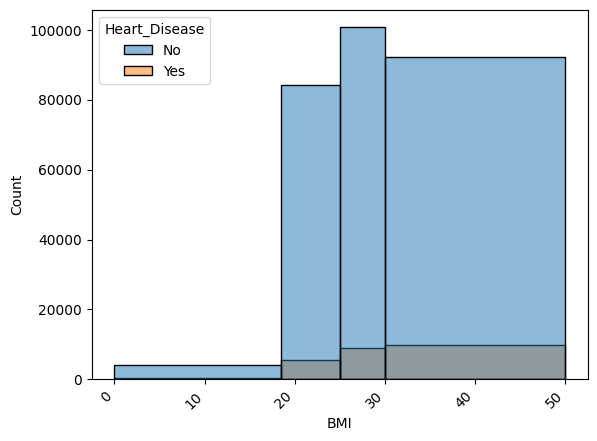

In [ ]:
fig = sns.histplot(data = df, x = 'BMI', hue = 'Heart_Disease', bins = [0, 18.5, 25, 30, 50])
fig = plt.setp(fig.get_xticklabels(), ha = 'right', rotation = 45)

Of the patients who reported heart disease, the majority had BMI values in the overweight and obese range.

##BMI vs Skin Cancer

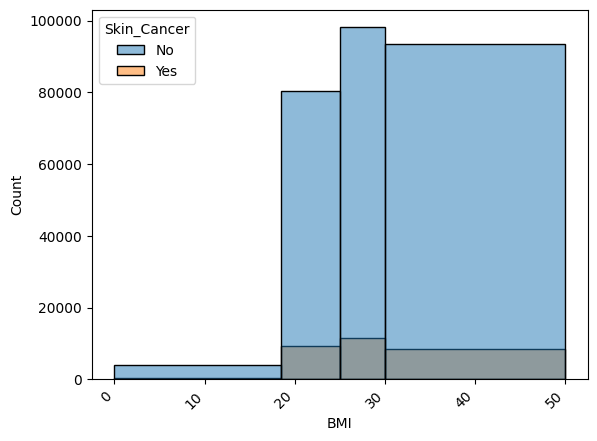

In [ ]:
fig = sns.histplot(data = df, x = 'BMI', hue = 'Skin_Cancer', bins = [0, 18.5, 25, 30, 50])
fig = plt.setp(fig.get_xticklabels(), ha = 'right', rotation = 45)

There does not appear to be much correlation between BMI and skin cancer.

##BMI vs Other Cancer

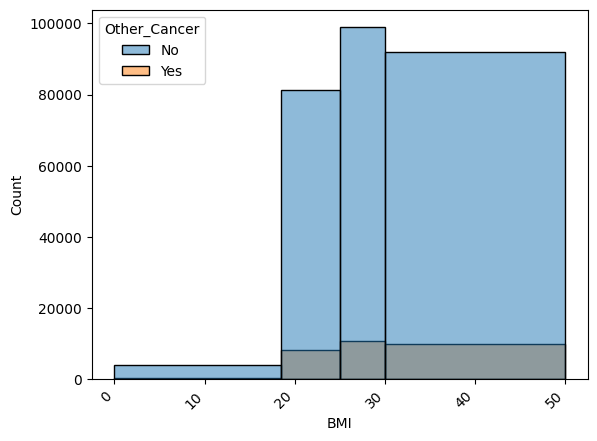

In [ ]:
fig = sns.histplot(data = df, x = 'BMI', hue = 'Other_Cancer', bins = [0, 18.5, 25, 30, 50])
fig = plt.setp(fig.get_xticklabels(), ha = 'right', rotation = 45)

There does not appear to be a correlation between BMI and cancer.

##BMI vs Diabetes

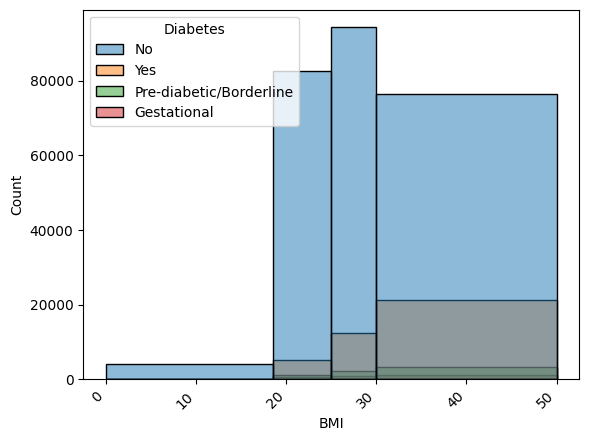

In [ ]:
fig = sns.histplot(data = df, x = 'BMI', hue = 'Diabetes', bins = [0, 18.5, 25, 30, 50])
fig = plt.setp(fig.get_xticklabels(), ha = 'right', rotation = 45)

Of the patients that reported diabetes, the majority of patients have a BMI in the overweight and obese range.

##BMI vs Arthritis

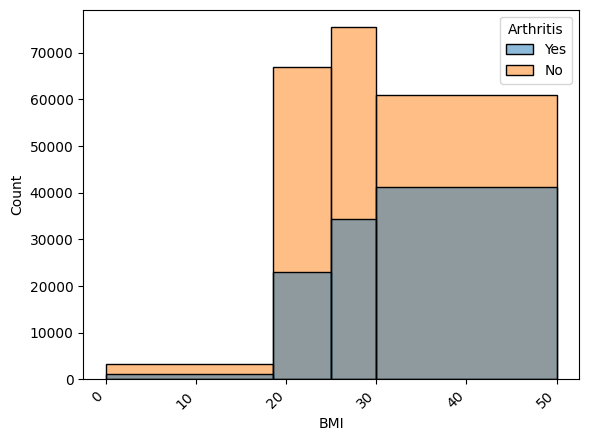

In [ ]:
fig = sns.histplot(data = df, x = 'BMI', hue = 'Arthritis', bins = [0, 18.5, 25, 30, 50])
fig = plt.setp(fig.get_xticklabels(), ha = 'right', rotation = 45)

Of the patients that reported arthritis, the majority of patients have a BMI in the overweight and obese range.

# Correlation Analysis

##Convert categorical variables to numerical variables

###General Health

In [ ]:
# 0 for Poor health, 1 for Fair Health, 2 for Good Health, 3 for Very Good Health, 4 for Excellent Health
df['General_Health'].replace({'Poor': '0'}, inplace = True)
df['General_Health'].replace({'Fair': '1'}, inplace = True)
df['General_Health'].replace({'Good': '2'}, inplace = True)
df['General_Health'].replace({'Very Good': '3'}, inplace = True)
df['General_Health'].replace({'Excellent': '4'}, inplace = True)

###Checkup

In [ ]:
# 0 for within the past year, 1 for within the past 2 years, 2 for within the past 5 years, 3 for 5 or more years ago, 4 for never
df['Checkup'].replace({'Within the past year': '0'}, inplace = True)
df['Checkup'].replace({'Within the past 2 years': '1'}, inplace = True)
df['Checkup'].replace({'Within the past 5 years': '2'}, inplace = True)
df['Checkup'].replace({'5 or more years ago': '4'}, inplace = True)
df['Checkup'].replace({'Never': '4'}, inplace = True)

###Exercise

In [ ]:
# 0 for No, 1 for Yes
df['Exercise'].replace({'No': '0'}, inplace = True)
df['Exercise'].replace({'Yes': '1'}, inplace = True)

###Heart Disease

In [ ]:
# 0 for No, 1 for Yes
df['Heart_Disease'].replace({'No': '0'}, inplace = True)
df['Heart_Disease'].replace({'Yes': '1'}, inplace = True)

###Skin Cancer

In [ ]:
# 0 for No, 1 for Yes
df['Skin_Cancer'].replace({'No': '0'}, inplace = True)
df['Skin_Cancer'].replace({'Yes': '1'}, inplace = True)

###Other Cancer

In [ ]:
# 0 for No, 1 for Yes
df['Other_Cancer'].replace({'No': '0'}, inplace = True)
df['Other_Cancer'].replace({'Yes': '1'}, inplace = True)

###Depression

In [ ]:
# 0 for No, 1 for Yes
df['Depression'].replace({'No': '0'}, inplace = True)
df['Depression'].replace({'Yes': '1'}, inplace = True)

###Diabetes

In [ ]:
# 0 for No, 1 for Pre-diabetic/Borderline, 2 for Gestational, 3 for Yes
df['Diabetes'].replace({'No': '0'}, inplace = True)
df['Diabetes'].replace({'Pre-diabetic/Borderline': '1'}, inplace = True)
df['Diabetes'].replace({'Gestational': '2'}, inplace = True)
df['Diabetes'].replace({'Yes': '3'}, inplace = True)

###Arthritis

In [ ]:
# 0 for No, 1 for Yes
df['Arthritis'].replace({'No': '0'}, inplace = True)
df['Arthritis'].replace({'Yes': '1'}, inplace = True)

###Sex

In [ ]:
# 0 for Male, 1 for Female
df['Sex'].replace({'Male': '0'}, inplace = True)
df['Sex'].replace({'Female': '1'}, inplace = True)

###Age Category

In [ ]:
# 0 for 18-29, 1 for 30-39, 2 for 40-49, 3 for 50-59, 4 for 60-69, 5 for 70-79, 6 for 80+
df['Age_Category'].replace({'18-29': '0'}, inplace = True)
df['Age_Category'].replace({'30-39': '1'}, inplace = True)
df['Age_Category'].replace({'40-49': '2'}, inplace = True)
df['Age_Category'].replace({'50-59': '3'}, inplace = True)
df['Age_Category'].replace({'60-69': '4'}, inplace = True)
df['Age_Category'].replace({'70-79': '5'}, inplace = True)
df['Age_Category'].replace({'80+': '6'}, inplace = True)


###Smoking

In [ ]:
# 0 for No, 1 for Yes
df['Smoking_History'].replace({'No': '0'}, inplace = True)
df['Smoking_History'].replace({'Yes': '1'}, inplace = True)

##Convert Variable Types

In [ ]:
# Convert variable types to int
df['Checkup'] = df['Checkup'].astype(int)
df['Exercise'] = df['Exercise'].astype(int)
df['Heart_Disease'] = df['Heart_Disease'].astype(int)
df['Skin_Cancer'] = df['Skin_Cancer'].astype(int)
df['Other_Cancer'] = df['Other_Cancer'].astype(int)
df['Depression'] = df['Depression'].astype(int)
df['Diabetes'] = df['Diabetes'].astype(int)
df['Arthritis'] = df['Arthritis'].astype(int)
df['Sex'] = df['Sex'].astype(int)
df['Age_Category'] = df['Age_Category'].astype(int)
df['Smoking_History'] = df['Smoking_History'].astype(int)

##Dummy Variable

###Sex

In [ ]:
df = pd.get_dummies(df, columns=['Sex'])

# rename dummy variables
df.rename({'Sex_0': 'Male', 'Sex_1': 'Female'}, axis=1, inplace=True)

##Correlation Matrix

<ipython-input-64-da2c8415e98a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(df.corr(),  annot = True, fmt = '.2f', cmap = 'coolwarm', ax = ax)


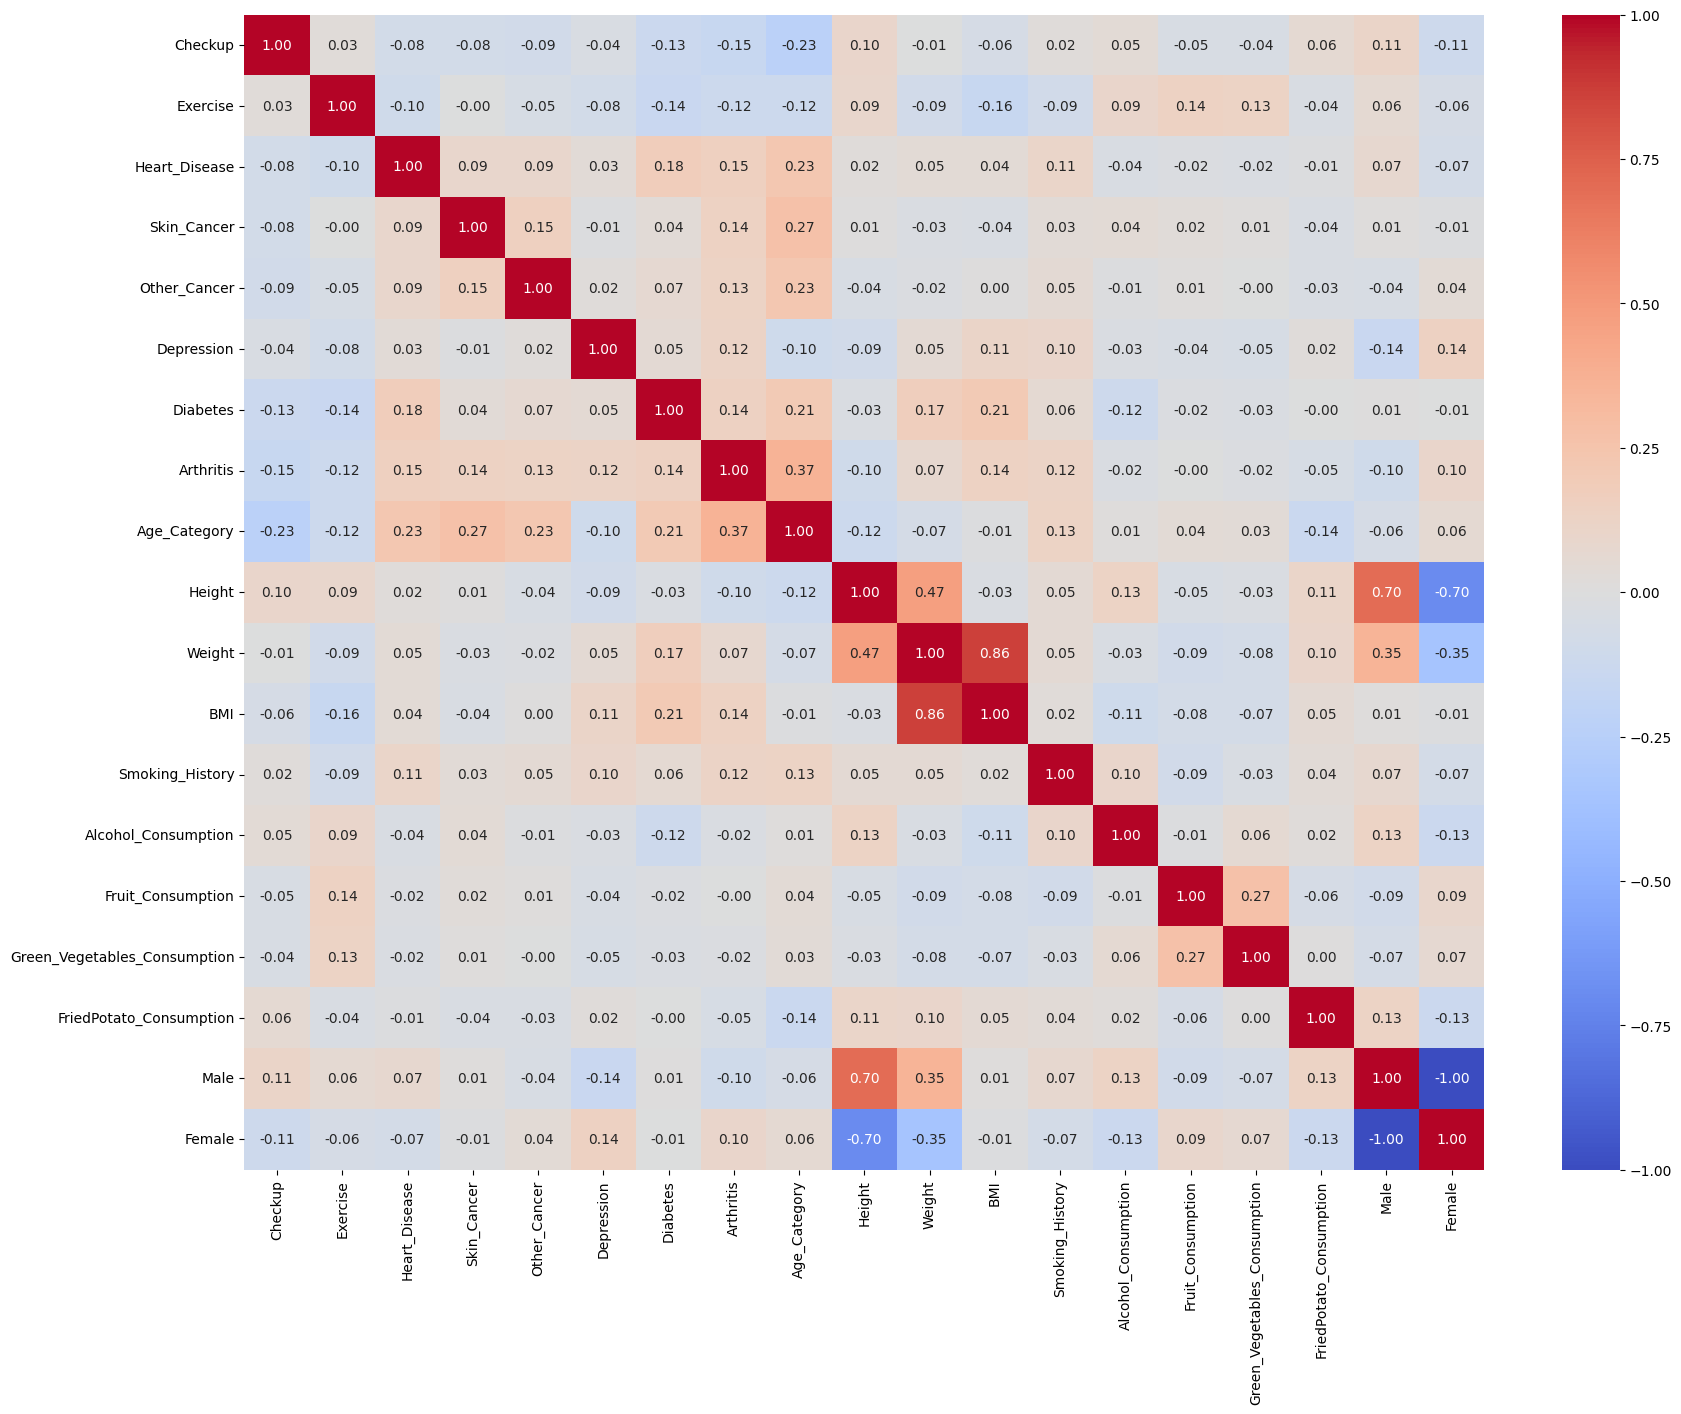

In [ ]:
fig, ax = plt.subplots(figsize = (20, 15))
g = sns.heatmap(df.corr(),  annot = True, fmt = '.2f', cmap = 'coolwarm', ax = ax)

Looking at the heatmap, there is a slight correlation between heart disease and arthritis, diabetes, age, weight, BMI, and smoking history. Males also have a slightly higher correlation to heart disease than females.